In [1]:
from global_search_recommendation.BioInspiredRecomendation import BioInspiredRecomendation
from SheetsConversor import SheetsConversor
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import pandas as pd

In [2]:
conversor = SheetsConversor('../sheets/')
uc_name = '../sheets/UFPR.xlsx - 19450729'
ucs, mods, contract = conversor.convert(target=uc_name)

Reading ../sheets/UFPR.xlsx...
Done! 1 UCs conveted!


In [3]:
selected_uc, selected_uc_mod = ucs[uc_name], mods[uc_name]
selected_uc['date'] = selected_uc['year'].astype(str) + '/' + selected_uc['month'].astype(str)
selected_uc.drop(columns=['year', 'month', 'contract_peak_demand_in_kw', 'contract_off_peak_demand_in_kw', 'cost_reais', 'peak_exceeded_in_kw','off_peak_exceeded_in_kw'], inplace=True)

In [4]:
display(selected_uc)

,peak_consumption_in_kwh,off_peak_consumption_in_kwh,peak_measured_demand_in_kw,off_peak_measured_demand_in_kw,date
0,41474,523040,950.40,1782.72,2019/1
1,51582,620900,1137.60,1981.44,2019/2
2,52979,540543,1278.72,2136.96,2019/3
3,64179,611951,1244.16,1969.92,2019/4
4,53885,569801,1195.20,1955.52,2019/5
5,64353,601745,1157.76,1736.64,2019/6
6,51693,535498,1097.28,1598.40,2019/7
7,54756,572229,1154.88,1779.84,2019/8
8,69804,639102,1353.60,1955.52,2019/9
9,62151,593082,1264.32,2050.56,2019/10


In [5]:
plt.rcParams["figure.figsize"] = (26, 8)

'''plt.plot(selected_uc.date, selected_uc.off_peak_consumption_in_kwh, 'rs-', label='Fora de Pico (kwh)')

# Adding labels and title
plt.xlabel('Meses')
plt.ylabel('Consumo medido (kwh)')
plt.legend()

# Display the plot
plt.show()

plt.plot(selected_uc.date, selected_uc.peak_consumption_in_kwh, 'o-', label='Pico (kwh)')

# Adding labels and title
plt.xlabel('Meses')
plt.ylabel('Consumo medido (kwh)')
plt.legend()

plt.show()'''


"plt.plot(selected_uc.date, selected_uc.off_peak_consumption_in_kwh, 'rs-', label='Fora de Pico (kwh)')\n\n# Adding labels and title\nplt.xlabel('Meses')\nplt.ylabel('Consumo medido (kwh)')\nplt.legend()\n\n# Display the plot\nplt.show()\n\nplt.plot(selected_uc.date, selected_uc.peak_consumption_in_kwh, 'o-', label='Pico (kwh)')\n\n# Adding labels and title\nplt.xlabel('Meses')\nplt.ylabel('Consumo medido (kwh)')\nplt.legend()\n\nplt.show()"

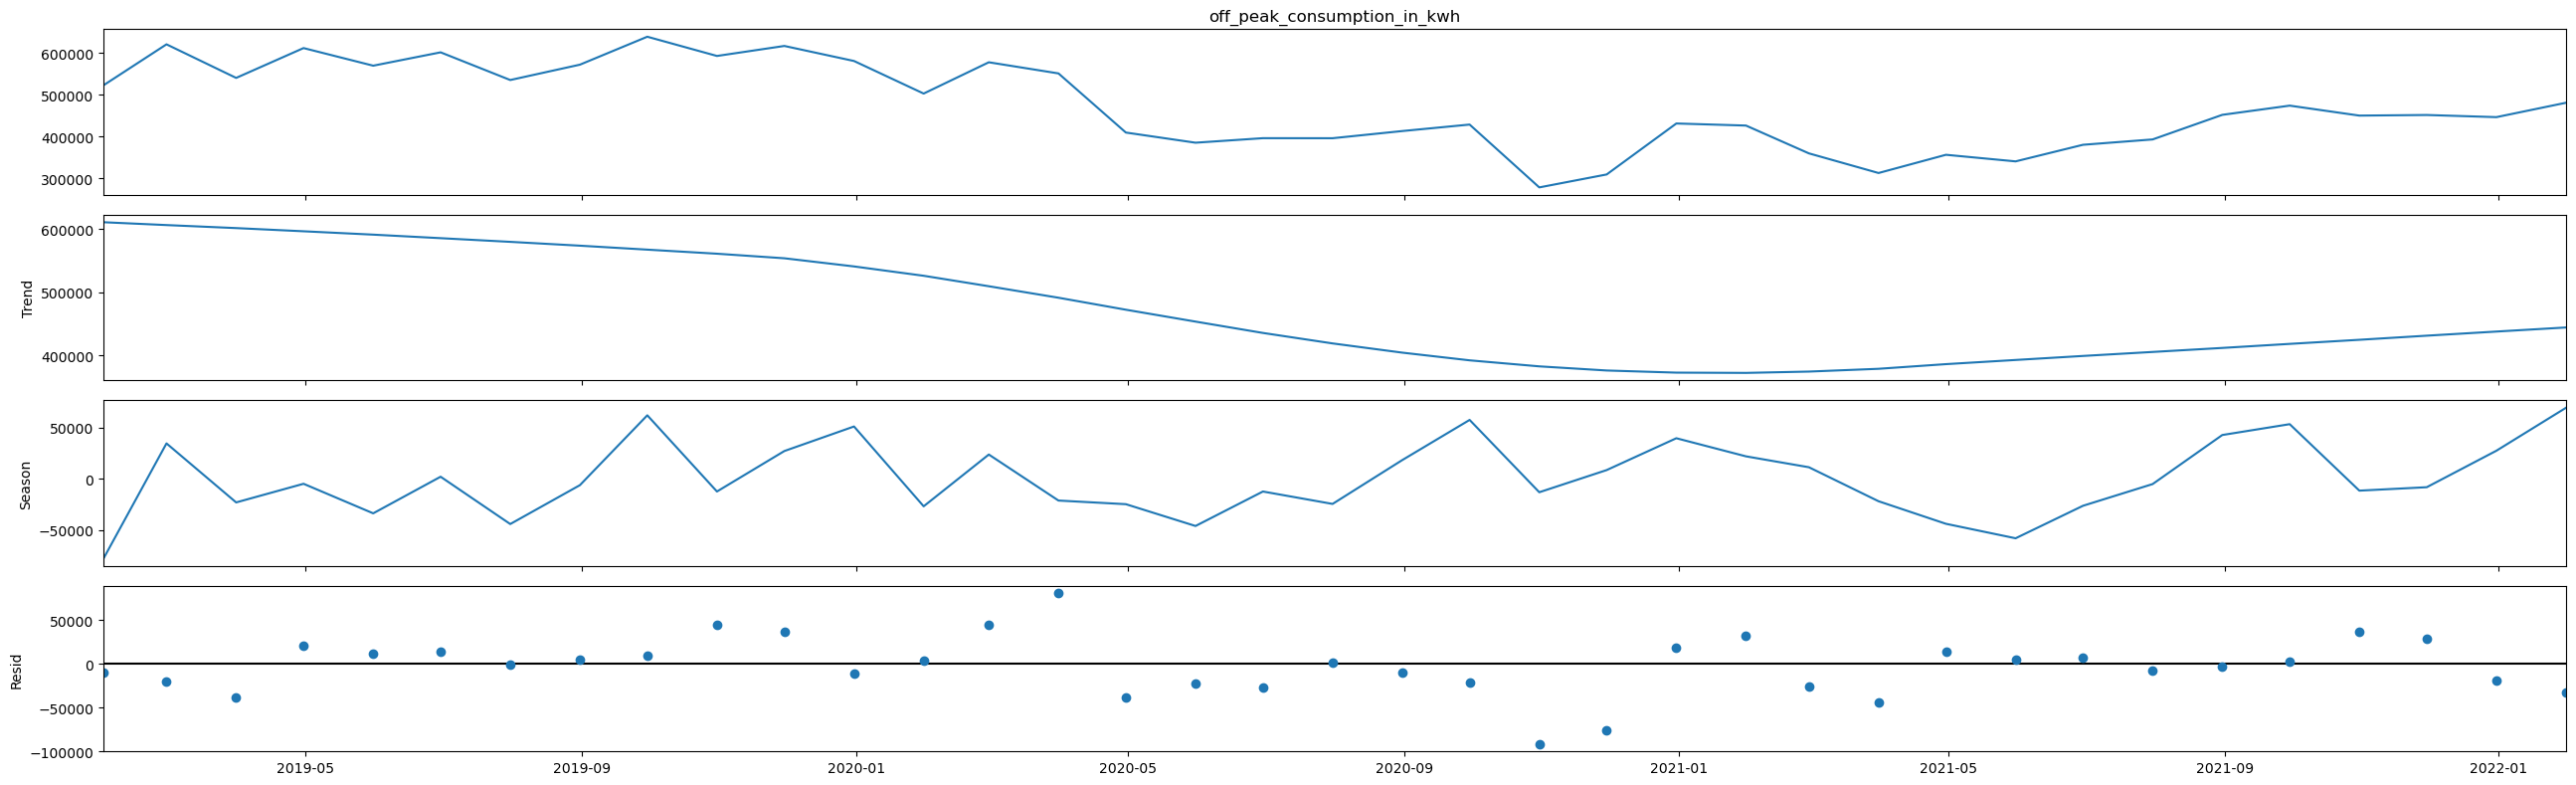

In [6]:
df = pd.DataFrame(selected_uc.off_peak_consumption_in_kwh)
df.index = pd.date_range(start='2019-01-01', periods=len(df), freq='M')
#display(df)
stl = STL(df['off_peak_consumption_in_kwh'], seasonal=13).fit()
stl.plot()
plt.show()

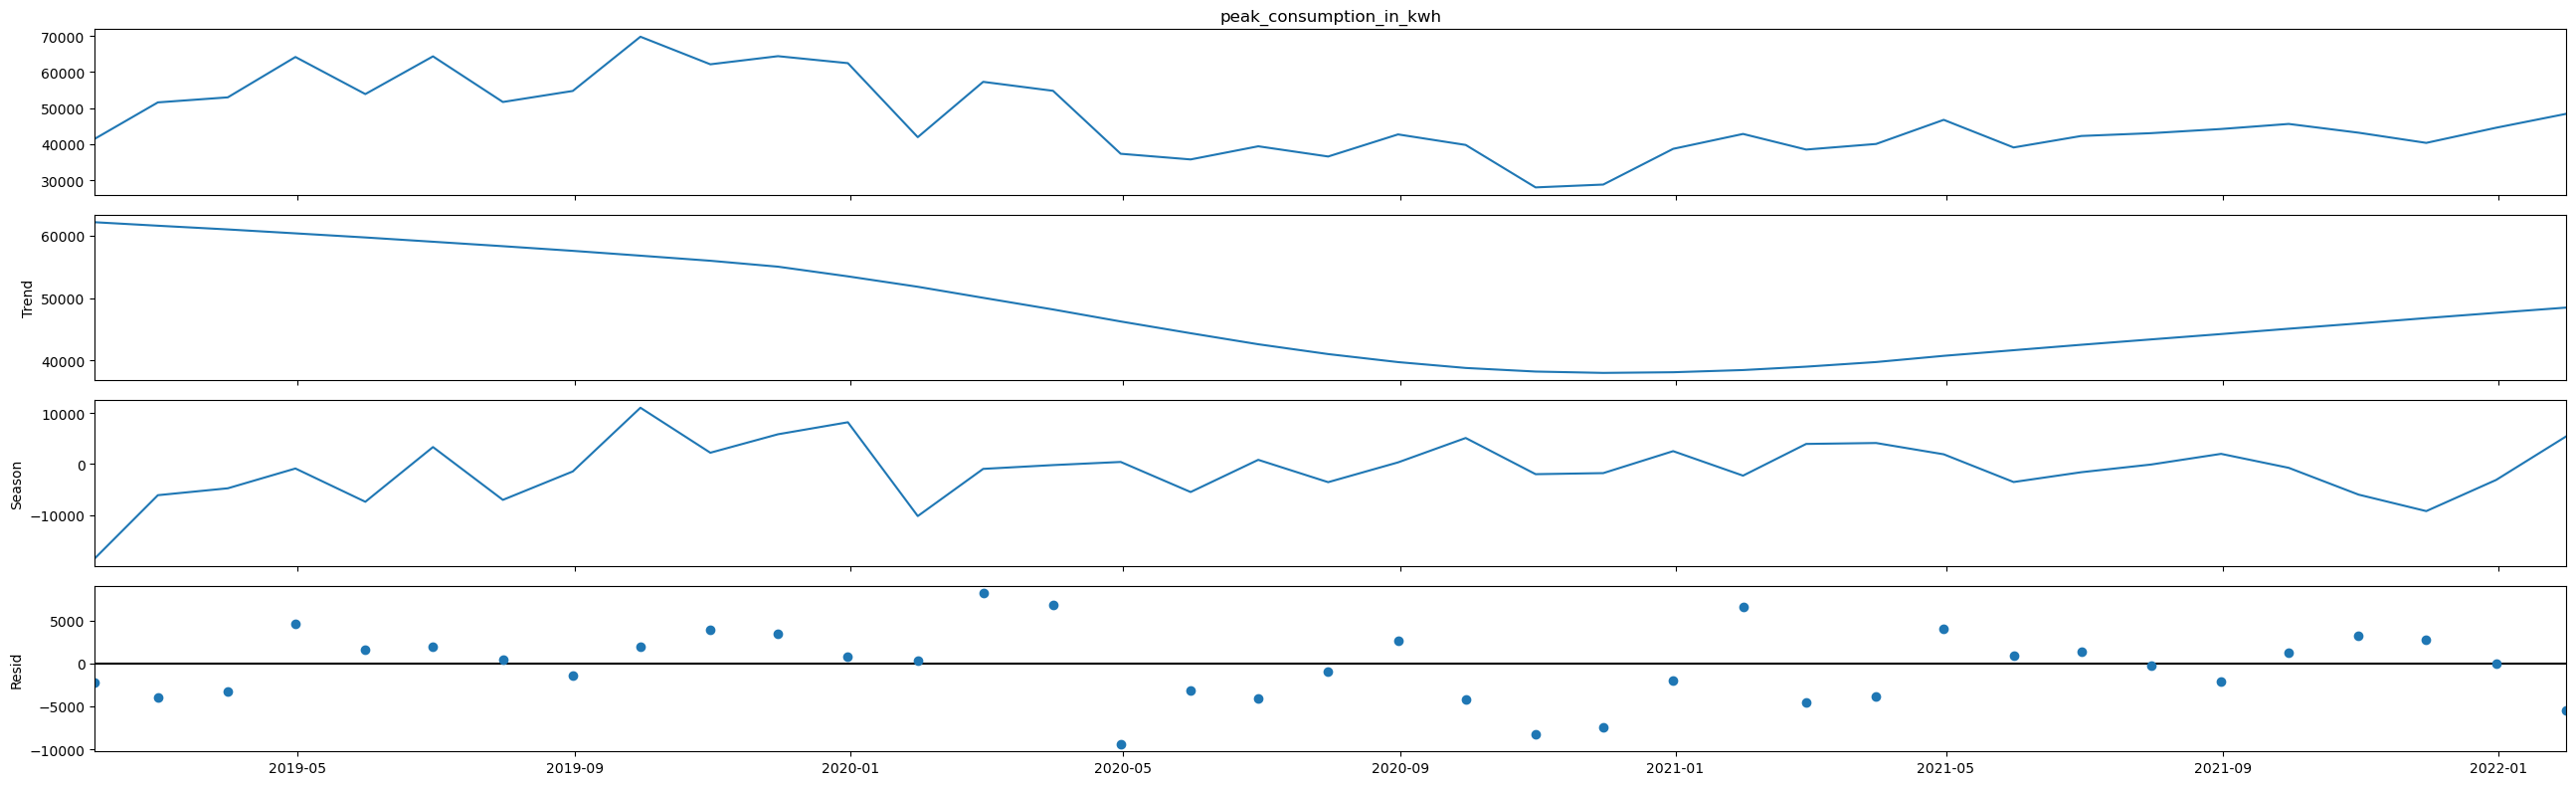

In [7]:
df = pd.DataFrame(selected_uc.peak_consumption_in_kwh)
df.index = pd.date_range(start='2019-01-01', periods=len(df), freq='M')
#display(df)
stl = STL(df['peak_consumption_in_kwh'], seasonal=13).fit()
stl.plot()
plt.show()

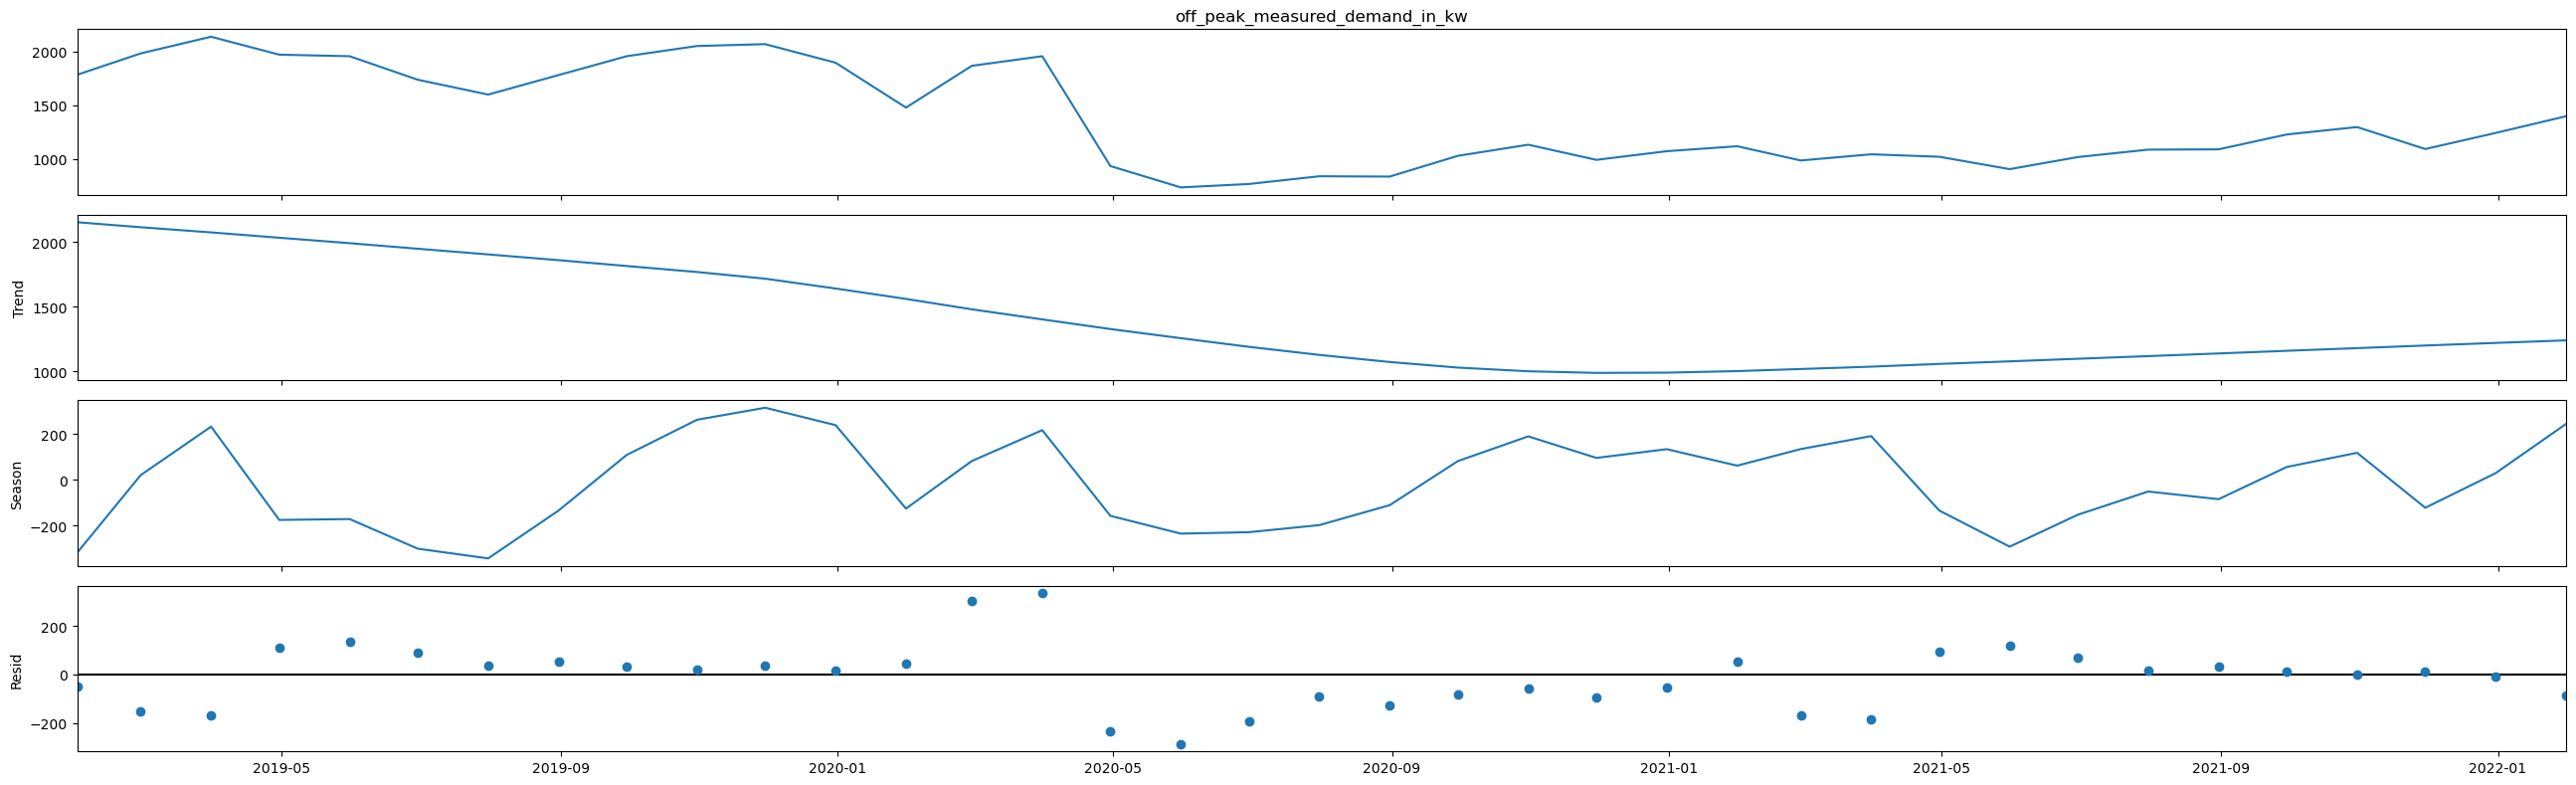

In [12]:
df = pd.DataFrame(selected_uc.off_peak_measured_demand_in_kw)
df.index = pd.date_range(start='2019-01-01', periods=len(df), freq='M')
#display(df)
stl = STL(df['off_peak_measured_demand_in_kw'], seasonal=13).fit()
stl.plot()
plt.show()

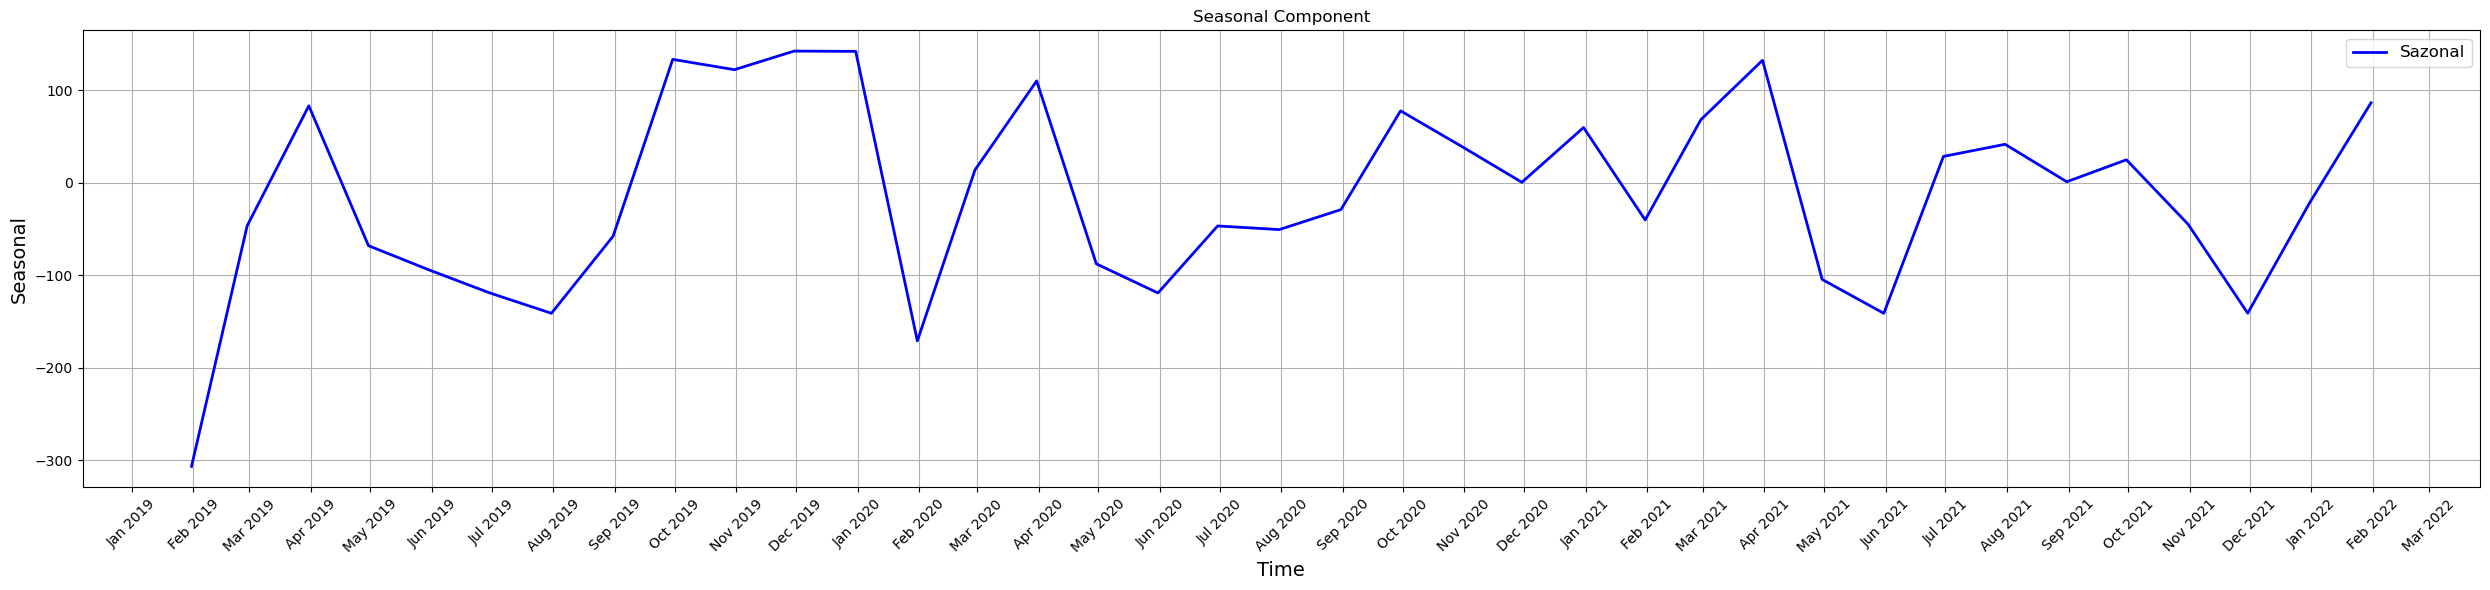

In [9]:
import matplotlib.dates as mdates

df = pd.DataFrame(selected_uc.peak_measured_demand_in_kw)
df.index = pd.date_range(start='2019-01-01', periods=len(df), freq='M')
#display(df)
stl = STL(df['peak_measured_demand_in_kw'], seasonal=13).fit()
#stl.plot() 'steps-mid', 'steps-pre', 'steps-post', 'steps'

seasonal = stl.seasonal

date_fmt = mdates.DateFormatter('%b %Y')

plt.figure(figsize=(25, 6))
plt.plot(seasonal, color='blue', linestyle='-', drawstyle='default', linewidth=2, label='Sazonal')
plt.title('Seasonal Component')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Seasonal', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.gca().xaxis.set_major_formatter(date_fmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()